In [1]:
import pandas as pd 
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('train_loan_prediction.csv')
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [3]:
df.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [4]:
df.dtypes

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

In [5]:
df1 = df.copy()

In [6]:
df.shape

(614, 13)

In [7]:
df.drop("Loan_ID", axis=1, inplace=True)
df.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [8]:
df.isnull().sum()

Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [9]:
df.dtypes

Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

In [10]:
#imputing the missing values
df['Gender'].fillna(df['Gender'].mode()[0], inplace=True)
df['Married'].fillna(df['Married'].mode()[0], inplace=True)
df['Dependents'].fillna(df['Dependents'].mode()[0], inplace=True)
df['Self_Employed'].fillna(df['Self_Employed'].mode()[0], inplace=True)
df['Credit_History'].fillna(df['Credit_History'].mode()[0], inplace=True)  

In [11]:
df.isnull().sum()

Gender                0
Married               0
Dependents            0
Education             0
Self_Employed         0
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History        0
Property_Area         0
Loan_Status           0
dtype: int64

In [12]:
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.ensemble import RandomForestRegressor
df1 = df.loc[:,["LoanAmount", "Loan_Amount_Term"]]
imp = IterativeImputer(RandomForestRegressor(), max_iter=10, random_state=0)
df1 = pd.DataFrame(imp.fit_transform(df1), columns=df1.columns)


In [13]:
df1.head()

,LoanAmount,Loan_Amount_Term
0,146.584354,360.0
1,128.000000,360.0
2,66.000000,360.0
3,120.000000,360.0
4,141.000000,360.0


In [14]:
df[["LoanAmount", "Loan_Amount_Term"]] = df1

In [15]:
df1.isnull().sum()

LoanAmount          0
Loan_Amount_Term    0
dtype: int64

In [16]:
df.isnull().sum()

Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [17]:
df['Gender'] = df['Gender'].map({"Male":0, "Female":1}).astype(int)
df['Married'] = df['Married'].map({"No":0, "Yes":1}).astype(int)
df['Dependents'] = df['Dependents'].map({"0":0, "1":1, "2":2, "3+":3}).astype(int)
df['Self_Employed'] = df['Self_Employed'].map({"No":0, "Yes":1}).astype(int)
df['Credit_History'] = df['Credit_History'].astype(int)
df['Property_Area'] = df['Property_Area'].map({"Urban":0, "Rural":1, "Semiurban":2}).astype(int)
df['Education'] = df['Education'].map({"Not Graduate":0, "Graduate":1}).astype(int)

In [18]:
df.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,0,0,0,1,0,5849,0.0,146.584354,360.0,1,0,Y
1,0,1,1,1,0,4583,1508.0,128.000000,360.0,1,1,N
2,0,1,0,1,1,3000,0.0,66.000000,360.0,1,0,Y
3,0,1,0,0,0,2583,2358.0,120.000000,360.0,1,0,Y
4,0,0,0,1,0,6000,0.0,141.000000,360.0,1,0,Y


C:\Anaconda\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='ApplicantIncome', ylabel='Density'>

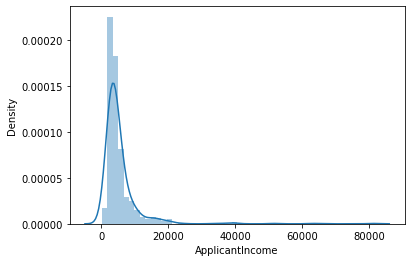

In [19]:
sns.distplot(df["ApplicantIncome"])

C:\Anaconda\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='CoapplicantIncome', ylabel='Density'>

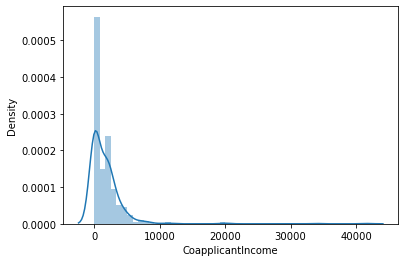

In [20]:
sns.distplot(df["CoapplicantIncome"])

C:\Anaconda\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='LoanAmount', ylabel='Density'>

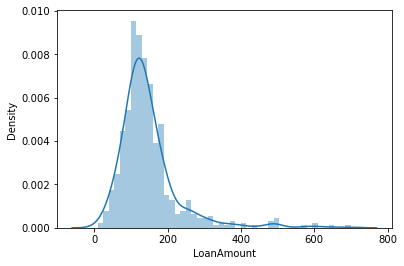

In [21]:
sns.distplot(df["LoanAmount"])

In [22]:
df["LoanAmount_log"] = np.log(df["LoanAmount"])

C:\Anaconda\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='LoanAmount_log', ylabel='Density'>

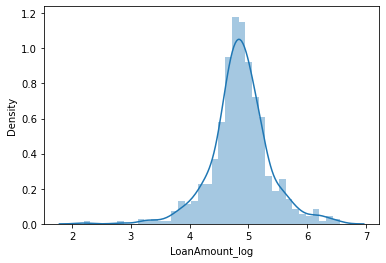

In [23]:
sns.distplot(df["LoanAmount_log"])

C:\Anaconda\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Total_Income', ylabel='Density'>

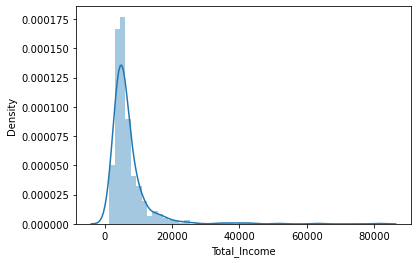

In [24]:
#feature engineering
df["Total_Income"] = df["ApplicantIncome"] + df["CoapplicantIncome"]
sns.distplot(df["Total_Income"])

C:\Anaconda\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Total_Income_log', ylabel='Density'>

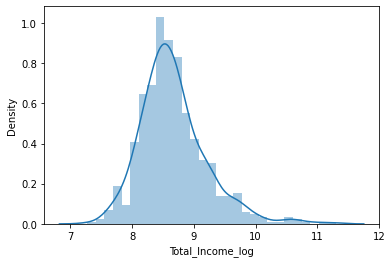

In [25]:
df["Total_Income_log"] = np.log(df["Total_Income"])
sns.distplot(df["Total_Income_log"])

In [26]:
df.drop(['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Total_Income'], axis=1)

,Gender,Married,Dependents,Education,Self_Employed,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,LoanAmount_log,Total_Income_log
0,0,0,0,1,0,360.0,1,0,Y,4.987601,8.674026
1,0,1,1,1,0,360.0,1,1,N,4.852030,8.714568
2,0,1,0,1,1,360.0,1,0,Y,4.189655,8.006368
3,0,1,0,0,0,360.0,1,0,Y,4.787492,8.505323
4,0,0,0,1,0,360.0,1,0,Y,4.948760,8.699515
...,...,...,...,...,...,...,...,...,...,...,...
609,1,0,0,1,0,360.0,1,1,Y,4.262680,7.972466
610,0,1,3,1,0,180.0,1,1,Y,3.688879,8.320205
611,0,1,1,1,0,360.0,1,0,Y,5.533389,9.025456
612,0,1,2,1,0,360.0,1,0,Y,5.231109,8.933664


In [27]:
df = df[["Gender", "Married", "Dependents", "Education", "Self_Employed", "Loan_Amount_Term", "Credit_History", "Property_Area", "LoanAmount_log", "Total_Income_log", "Loan_Status"]]
df.head()

,Gender,Married,Dependents,Education,Self_Employed,Loan_Amount_Term,Credit_History,Property_Area,LoanAmount_log,Total_Income_log,Loan_Status
0,0,0,0,1,0,360.0,1,0,4.987601,8.674026,Y
1,0,1,1,1,0,360.0,1,1,4.852030,8.714568,N
2,0,1,0,1,1,360.0,1,0,4.189655,8.006368,Y
3,0,1,0,0,0,360.0,1,0,4.787492,8.505323,Y
4,0,0,0,1,0,360.0,1,0,4.948760,8.699515,Y


In [28]:
df['Loan_Status'] = df['Loan_Status'].map({"N":0, "Y":1}).astype(int)
df.head()

,Gender,Married,Dependents,Education,Self_Employed,Loan_Amount_Term,Credit_History,Property_Area,LoanAmount_log,Total_Income_log,Loan_Status
0,0,0,0,1,0,360.0,1,0,4.987601,8.674026,1
1,0,1,1,1,0,360.0,1,1,4.852030,8.714568,0
2,0,1,0,1,1,360.0,1,0,4.189655,8.006368,1
3,0,1,0,0,0,360.0,1,0,4.787492,8.505323,1
4,0,0,0,1,0,360.0,1,0,4.948760,8.699515,1


C:\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning

<AxesSubplot:xlabel='Credit_History', ylabel='count'>

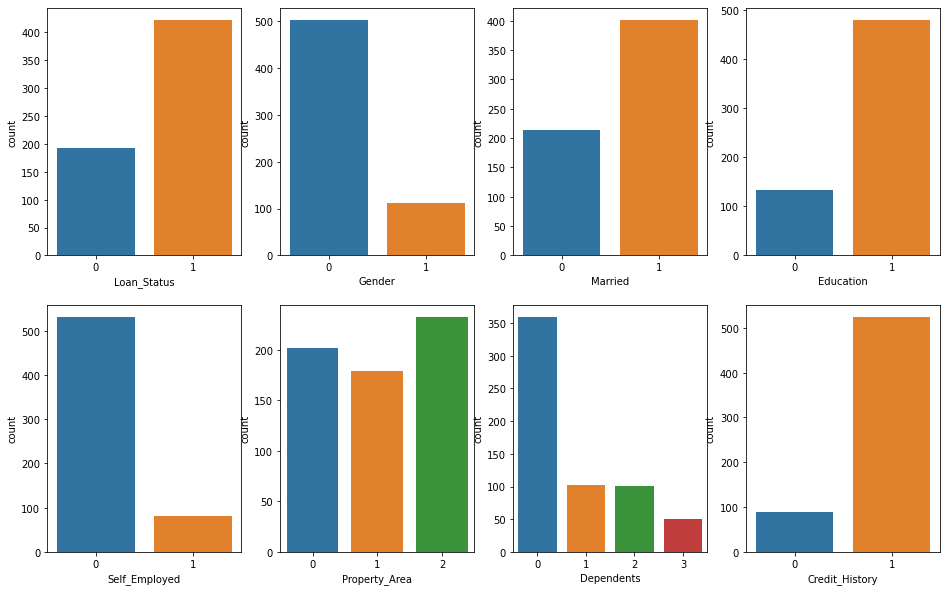

In [29]:
fig, ax = plt.subplots(2,4,figsize=(16,10))
sns.countplot('Loan_Status', data=df, ax=ax[0][0])
sns.countplot('Gender', data=df, ax=ax[0][1])
sns.countplot('Married', data=df, ax=ax[0][2])
sns.countplot('Education', data=df, ax=ax[0][3])
sns.countplot('Self_Employed', data=df, ax=ax[1][0])
sns.countplot('Property_Area', data=df, ax=ax[1][1])
sns.countplot('Dependents', data=df, ax=ax[1][2])
sns.countplot('Credit_History', data=df, ax=ax[1][3])



<AxesSubplot:xlabel='Gender'>

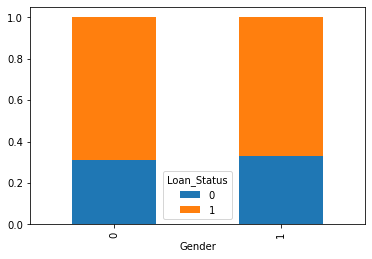

In [30]:
Gender = pd.crosstab(df["Gender"], df["Loan_Status"])
Gender.div(Gender.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True)


<AxesSubplot:xlabel='Married'>

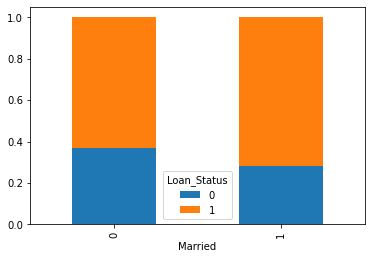

In [31]:
Married = pd.crosstab(df["Married"], df["Loan_Status"])
Married.div(Married.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True)

In [32]:
df.drop(['Gender'], inplace=True, axis=1)
df.head()

,Married,Dependents,Education,Self_Employed,Loan_Amount_Term,Credit_History,Property_Area,LoanAmount_log,Total_Income_log,Loan_Status
0,0,0,1,0,360.0,1,0,4.987601,8.674026,1
1,1,1,1,0,360.0,1,1,4.852030,8.714568,0
2,1,0,1,1,360.0,1,0,4.189655,8.006368,1
3,1,0,0,0,360.0,1,0,4.787492,8.505323,1
4,0,0,1,0,360.0,1,0,4.948760,8.699515,1


In [33]:
X = df.iloc[:, :-1]
y = df.iloc[:,-1]

In [35]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, test_size=0.2,random_state=0)
clf = RandomForestClassifier(n_estimators=22, max_depth=5, random_state=0)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
y_pred_train = clf.predict(X_train)
accuracy_test = accuracy_score(y_test, y_pred)
print("Accuracy score on test set is {}".format(accuracy_test))

Accuracy score on test set is 0.8130081300813008


In [36]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.81      0.39      0.53        33
           1       0.81      0.97      0.88        90

    accuracy                           0.81       123
   macro avg       0.81      0.68      0.71       123
weighted avg       0.81      0.81      0.79       123



In [37]:
print("Accuracy score on training set is {}".format(accuracy_score(clf.predict(X_train),y_train)))

Accuracy score on training set is 0.8228105906313645


In [38]:
print(classification_report(y_train, y_pred_train))

              precision    recall  f1-score   support

           0       0.96      0.47      0.63       159
           1       0.80      0.99      0.88       332

    accuracy                           0.82       491
   macro avg       0.88      0.73      0.76       491
weighted avg       0.85      0.82      0.80       491



In [39]:
from sklearn import tree
from sklearn import tree
for i in range(len(clf.estimators_)):
    print(tree.export_text(clf.estimators_[i]))

|--- feature_2 <= 0.50
|   |--- feature_6 <= 1.50
|   |   |--- feature_5 <= 0.50
|   |   |   |--- class: 0.0
|   |   |--- feature_5 >  0.50
|   |   |   |--- feature_8 <= 8.92
|   |   |   |   |--- feature_6 <= 0.50
|   |   |   |   |   |--- class: 1.0
|   |   |   |   |--- feature_6 >  0.50
|   |   |   |   |   |--- class: 0.0
|   |   |   |--- feature_8 >  8.92
|   |   |   |   |--- feature_7 <= 4.91
|   |   |   |   |   |--- class: 1.0
|   |   |   |   |--- feature_7 >  4.91
|   |   |   |   |   |--- class: 1.0
|   |--- feature_6 >  1.50
|   |   |--- feature_4 <= 78.00
|   |   |   |--- class: 0.0
|   |   |--- feature_4 >  78.00
|   |   |   |--- feature_3 <= 0.50
|   |   |   |   |--- feature_8 <= 8.38
|   |   |   |   |   |--- class: 1.0
|   |   |   |   |--- feature_8 >  8.38
|   |   |   |   |   |--- class: 1.0
|   |   |   |--- feature_3 >  0.50
|   |   |   |   |--- feature_7 <= 4.52
|   |   |   |   |   |--- class: 0.0
|   |   |   |   |--- feature_7 >  4.52
|   |   |   |   |   |--- class: 1.0
|

In [40]:
df.head()

,Married,Dependents,Education,Self_Employed,Loan_Amount_Term,Credit_History,Property_Area,LoanAmount_log,Total_Income_log,Loan_Status
0,0,0,1,0,360.0,1,0,4.987601,8.674026,1
1,1,1,1,0,360.0,1,1,4.852030,8.714568,0
2,1,0,1,1,360.0,1,0,4.189655,8.006368,1
3,1,0,0,0,360.0,1,0,4.787492,8.505323,1
4,0,0,1,0,360.0,1,0,4.948760,8.699515,1


In [41]:
df.to_csv('loan2.csv')

In [42]:
X_test.head()

,Married,Dependents,Education,Self_Employed,Loan_Amount_Term,Credit_History,Property_Area,LoanAmount_log,Total_Income_log
454,0,0,1,1,360.0,1,2,4.430817,8.865735
52,0,0,1,0,360.0,1,2,4.718499,8.349957
536,1,0,1,0,360.0,1,0,5.780744,9.214233
469,1,0,1,0,360.0,1,0,4.700480,8.822322
55,1,2,1,0,360.0,1,2,4.574711,8.262301


In [43]:
X_test['Loan_Status'] = y_test
X_test.head()

<ipython-input-43-c60a86c3f0f6>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test['Loan_Status'] = y_test


,Married,Dependents,Education,Self_Employed,Loan_Amount_Term,Credit_History,Property_Area,LoanAmount_log,Total_Income_log,Loan_Status
454,0,0,1,1,360.0,1,2,4.430817,8.865735,1
52,0,0,1,0,360.0,1,2,4.718499,8.349957,0
536,1,0,1,0,360.0,1,0,5.780744,9.214233,1
469,1,0,1,0,360.0,1,0,4.700480,8.822322,0
55,1,2,1,0,360.0,1,2,4.574711,8.262301,1


In [44]:
X_test.to_csv("loan_test.csv")